### Submitters:
* Dorit Lyakhovitsky (ID: 318244308)
* Haim Michalashvili (ID: 313544447)


[Kaggle Account](https://www.kaggle.com/doritlyakhovitsky)

### TL;DR

The height of the basement ceiling or the proximity to an east-west railroad isn't usually the first thing home buyers are asking about. But this House Prices competition proves that these tiny features have much more influence on the sale price than what we think.

In this competition we will **explore** the 79 features dataset, and **predict** the final price of each home using SGDRegressor (Linear Regression).

Essentially we will perform **Feature Selection**, **Cross Validation** and **Regularization techniques**.

### Imports

In [5]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import plotly.graph_objects as go

## Data Set Exploration



In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
test_houses_ids = test_df["Id"]

In [11]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Visualization

<ipython-input-14-e876364d4ed1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = np.abs(train_df.corr())


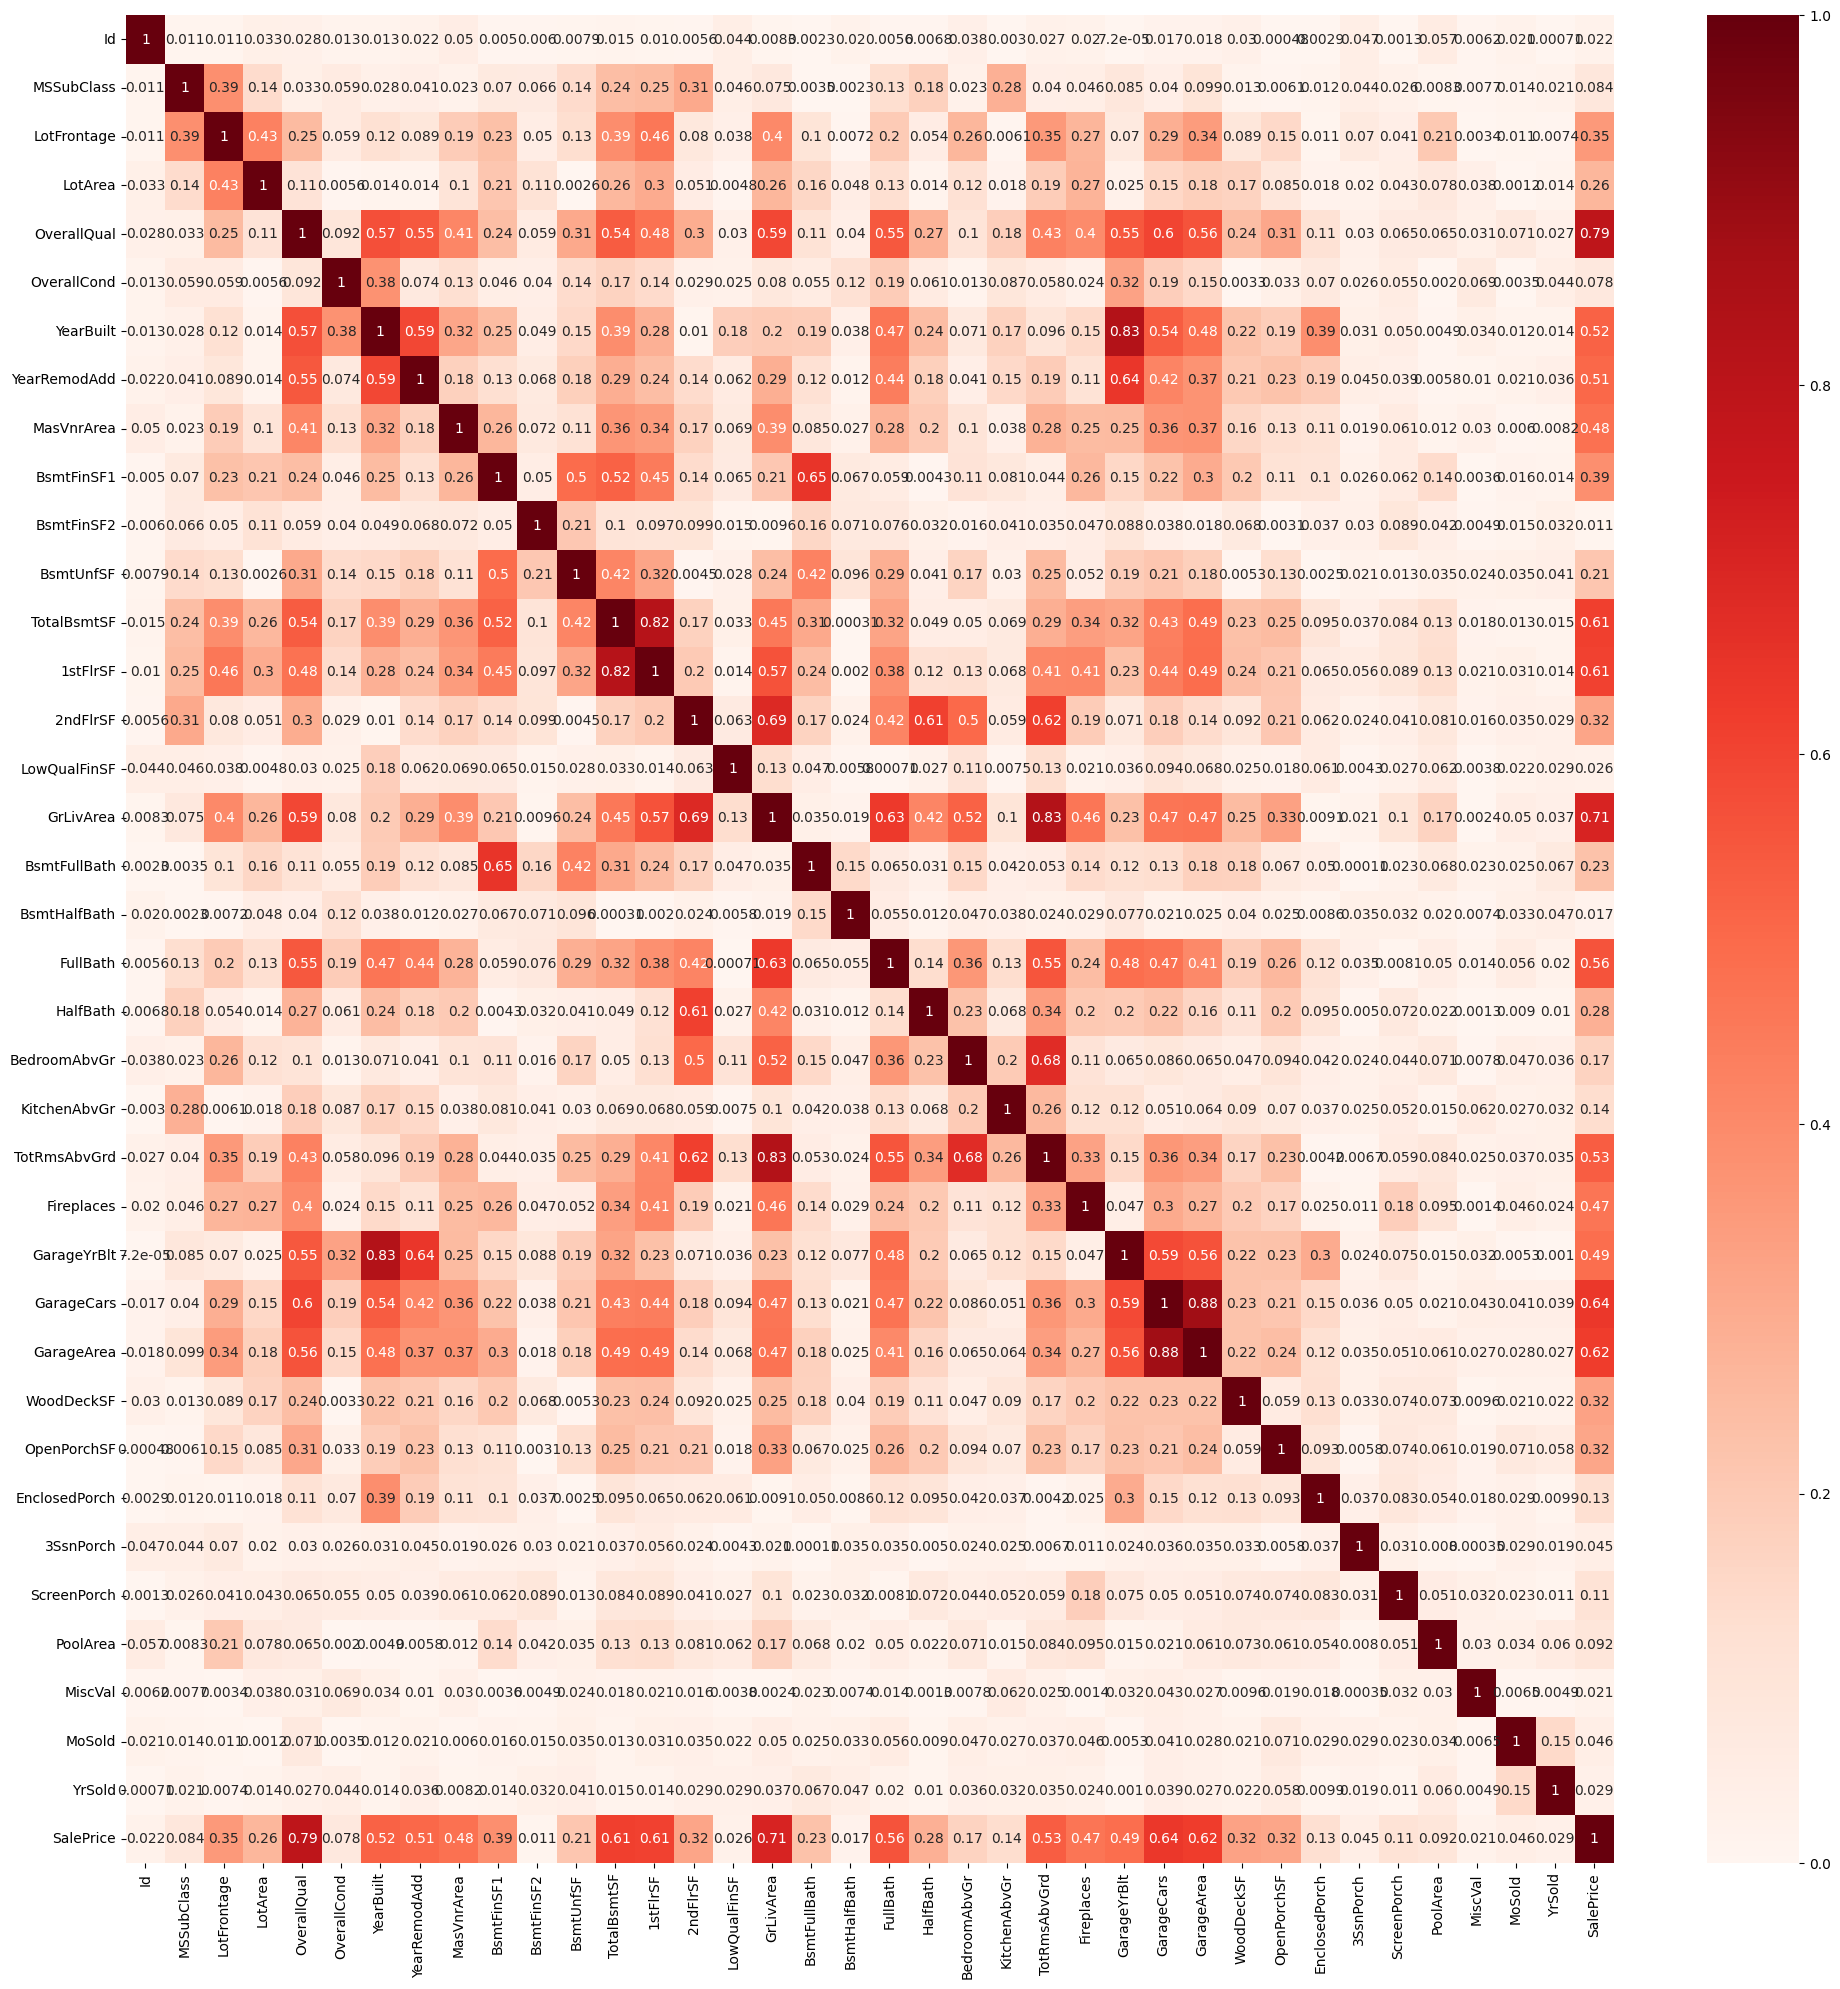

In [14]:
plt.figure(figsize=(24,24))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

## Pre Processing
Here we will fill all the null values (and let the Feature Selection Algorithms do the work) and we will encode the categorical values using OrdinalEncoder, and Normalize all the numerical values using StandardScaler.

In [15]:
def fill_null(x_df, numerical_cols, categorical_cols):
  var = x_df.isnull().sum()

  # fill null values in all columns
  for field, null_count in var.items():
    if null_count != 0:
      if field in numerical_cols:
        x_df[field].fillna(x_df[field].mean(), inplace=True)
      elif field in categorical_cols:
        x_df[field].fillna("U", inplace=True)

In [16]:
t_train = train_df['SalePrice'].copy()
X_train = train_df.drop(['SalePrice'], axis=1)
X_test = test_df

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

fill_null(X_train, numerical_cols, categorical_cols)
fill_null(X_test, numerical_cols, categorical_cols)

In [17]:
# Normalize categorical and numerical cols
ct_enc_std = ColumnTransformer([
          ("encoding", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-999), categorical_cols),
          ("standard", StandardScaler(), numerical_cols)])

X_train = pd.DataFrame(ct_enc_std.fit_transform(X_train), columns=all_cols)
X_test = pd.DataFrame(ct_enc_std.transform(X_test), columns=all_cols)

## Feature Selection

In this section we will calculate the best features according to a few feature selection algorithms, and later we will train the SGDRegressor model with those columns.

### Backward selection - RFECV

In [18]:
selector = RFECV(
    SGDRegressor(random_state=1),
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
    ).fit(X_train, t_train)

In [19]:
rfecv_result= X_train.loc[:, selector.support_]
rfecv_result_cols = rfecv_result.columns
display(rfecv_result_cols)

Index(['Street', 'Alley', 'LandContour', 'LandSlope', 'MasVnrType',
       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'CentralAir', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive',
       'PoolQC', 'MiscFeature', 'SaleCondition', 'MSSubClass', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

Analysis: RFECV chose 36 features.

### Forward selection - SFS

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

# Use SequentialFeatureSelector to do Forward Feature Selection
sfs = SequentialFeatureSelector(SGDRegressor(random_state=1), n_features_to_select=40)
sfs.fit(X_train, t_train)

SequentialFeatureSelector(estimator=SGDRegressor(random_state=1),
                          n_features_to_select=40)

In [21]:
sfs_result = X_train.loc[:, sfs.get_support()]
sfs_result_cols = sfs_result.columns
display(sfs_result_cols)

Index(['LotShape', 'Utilities', 'BldgType', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'Id',
       'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

Analysis: SFS chose 40 features (as instructed), but they are different from the RFECV results. Now we will perform a hybrid approch that combines the two different results, in hopes of getting a better score when ruuning on the TEST dataset.

### Hybrid Feature Selection - based on RFECV & SFS

In [22]:
# First, we are calculating the intersection columns (חיתוך)
hybrid_intersection_selection_cols = rfecv_result_cols.intersection(sfs_result_cols)
hybrid_intersection_selection_result = X_train[hybrid_intersection_selection_cols]
hybrid_intersection_selection_cols

Index(['ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'MSSubClass',
       'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea'],
      dtype='object')

In [23]:
# Secondly, we are calculating the union columns (איחוד)
hybrid_union_selection_cols = rfecv_result_cols.union(sfs_result_cols)
hybrid_union_selection_result = X_train[hybrid_union_selection_cols]
hybrid_union_selection_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual',
       'CentralAir', 'EnclosedPorch', 'ExterQual', 'Fireplaces', 'FullBath',
       'Functional', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MasVnrType', 'MiscFeature',
       'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC', 'SaleCondition', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'Utilities', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

## Regularization
Choosing best regularization algorithm (Lasso, Ridge, ElasticNet) based on Cross Validation Score on SGDRegressor.

In [24]:
# print lasso, ridge and elasticnet scores as regression
from sklearn.model_selection import cross_val_score

def get_best_SGDRegressor_penalty(X_df):
  sgd_lasso_reg = SGDRegressor(penalty='l1', random_state=1)
  sgd_ridge_reg = SGDRegressor(penalty='l2', random_state=1)
  sgd_elastic_reg = SGDRegressor(penalty='elasticnet', random_state=1)

  penalty_result = [
      {
        "penalty": "l1", # lasso
        "score": cross_val_score(sgd_lasso_reg, X_df, t_train, cv=15).mean()
      },
      {
        "penalty": "l2", # ridge
        "score": cross_val_score(sgd_ridge_reg, X_df, t_train, cv=15).mean()
      },
      {
        "penalty": "elasticnet", # elastic net
        "score": cross_val_score(sgd_elastic_reg, X_df, t_train, cv=15).mean()
      }
  ]
  max_penalty = max(penalty_result, key=lambda penalty: penalty['score'])

  print("R2 score for regression:")
  print(f"results: {penalty_result}")
  print('max_penalty', max_penalty['penalty'])

  return max_penalty['penalty']

Now we will run the SGDRegressor model for each features group from above (**RFECV, SFS, Hybrid Intersection, Hybrid union**) with different penalties and analyze the results.


In [25]:
print('RFECV best penalty:')
rfecv_penalty = get_best_SGDRegressor_penalty(rfecv_result)

RFECV best penalty:
R2 score for regression:
results: [{'penalty': 'l1', 'score': 0.7739426094339505}, {'penalty': 'l2', 'score': 0.773954582849698}, {'penalty': 'elasticnet', 'score': 0.7739527883715219}]
max_penalty l2


In [26]:
print('SFS best penalty:')
sfs_penalty = get_best_SGDRegressor_penalty(sfs_result)

SFS best penalty:
R2 score for regression:
results: [{'penalty': 'l1', 'score': 0.772075573833011}, {'penalty': 'l2', 'score': 0.7721069020377681}, {'penalty': 'elasticnet', 'score': 0.7721022066859546}]
max_penalty l2


In [27]:
print('Hybrid INTERSECTION best penalty:')
hybrid_intersection_penalty = get_best_SGDRegressor_penalty(hybrid_intersection_selection_result)


Hybrid INTERSECTION best penalty:
R2 score for regression:
results: [{'penalty': 'l1', 'score': 0.7583908336279046}, {'penalty': 'l2', 'score': 0.7584159384656476}, {'penalty': 'elasticnet', 'score': 0.7584121769698611}]
max_penalty l2


In [28]:
print('Hybrid UNION best penalty:')
hybrid_union_penalty = get_best_SGDRegressor_penalty(hybrid_union_selection_result)

Hybrid UNION best penalty:
R2 score for regression:
results: [{'penalty': 'l1', 'score': 0.7861152972738364}, {'penalty': 'l2', 'score': 0.7861335113521488}, {'penalty': 'elasticnet', 'score': 0.7861307814785954}]
max_penalty l2


Here we can see there is very little difference between the different penalties (less than 0.001). The best penalty according to these experminets is L2 (Ridge).

## Model creation
Now that we choose the best features to train with (4 groups), and found the best Regularization technique (L2 Ridge), we will train and create the model itself and predict on the train and validation dataset.

In [29]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X,
                          t,
                          model,
                          transformer=None,
                          k=None,
                          p=None,
                          show_score_loss_graphs=False):

    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        # from index to record assignment
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        # fit and predict
        model.fit(X_train, t_train)
        y_train = model.predict(X_train)
        y_val = model.predict(X_val)

        # assign results into scores df
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), root_mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =[i, 'val', model.score(X_val, t_val), root_mean_squared_error(t_val, y_val)]

    #split into two dfs , val and train
    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    #calculate mean score and loss for train and validation across all models
    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    return {
        "model": model,
        "val_Score": mean_val_score,
        "val_RMSELoss": mean_val_loss,
        "train_Score": mean_train_score,
        "train_RMSELoss": mean_train_loss
        }

In [30]:
# Use the rfecv feature selection result
model_calculated_using_rfecv = get_cv_score_and_loss(rfecv_result, t_train, SGDRegressor(penalty=rfecv_penalty, random_state=1), k=10)

# Use the sfs feature selection result
model_calculated_using_sfs = get_cv_score_and_loss(sfs_result, t_train, SGDRegressor(penalty=sfs_penalty, random_state=1), k=10)

# Use the hybrid intersection feature selection result
model_calculated_using_hybrid_intersect = get_cv_score_and_loss(hybrid_intersection_selection_result, t_train, SGDRegressor(penalty=hybrid_intersection_penalty, random_state=1), k=10)

# Use the hybrid union feature selection result
model_calculated_using_hybrid_union = get_cv_score_and_loss(hybrid_union_selection_result, t_train, SGDRegressor(penalty=hybrid_union_penalty, random_state=1), k=10)

## Graphs - showing loss and score as function of feature group

In [32]:
import plotly.express as px

# This function is used to print the accuracy/log loss graphs
def print_graphs(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'Score' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'Score' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [33]:
# plot the score by split and the loss by split
def plot_score_and_loss_by_split(rfecv, sfs, hybrid_intersect, hybrid_union):
    graph_points = {
                    'train_RMSELoss': {},
                    'val_RMSELoss': {},
                    'train_Score': {},
                    'val_Score': {}
                    }
    for key in graph_points:
        graph_points[key][0] = rfecv[key]
        graph_points[key][1] = sfs[key]
        graph_points[key][2] = hybrid_intersect[key]
        graph_points[key][3] = hybrid_union[key]
    print_graphs(graph_points)

plot_score_and_loss_by_split(model_calculated_using_rfecv,
                             model_calculated_using_sfs,
                             model_calculated_using_hybrid_intersect,
                             model_calculated_using_hybrid_union)

Analysis - Here we can see that the **lowest validation loss** was for group 1 SFS (min=36.07K, max=37.52K). and the **biggests validation score** was for group 1 SFS (but not by a lot - min=0.75, max=0.77).

Since the differences are so little in comparison, we should really test out all models on the TEST dataset.

## Submission
Now we will predict on the train and validation dataset and submit to Kaggle.

In [34]:
def model_prediction(X_test, feature_selection_columns, test_houses_ids, model, feature_selection_type):
  X_test = X_test[feature_selection_columns]

  Y_test = model.predict(X_test)
  submission_df = pd.DataFrame({"Id": test_houses_ids.values, "SalePrice": Y_test})
  submission_df.to_csv(f"submission_{feature_selection_type}.csv", index=False)
  submission_df.head()

In [37]:
model_prediction(X_test, rfecv_result_cols, test_houses_ids, model_calculated_using_rfecv["model"], 'rfecv')
model_prediction(X_test, sfs_result_cols, test_houses_ids, model_calculated_using_sfs["model"], 'sfs')
model_prediction(X_test, hybrid_intersection_selection_cols, test_houses_ids, model_calculated_using_hybrid_intersect["model"], 'hybrid_intersect')
model_prediction(X_test, hybrid_union_selection_cols, test_houses_ids, model_calculated_using_hybrid_union["model"], 'hybrid_union')


## Screenshots

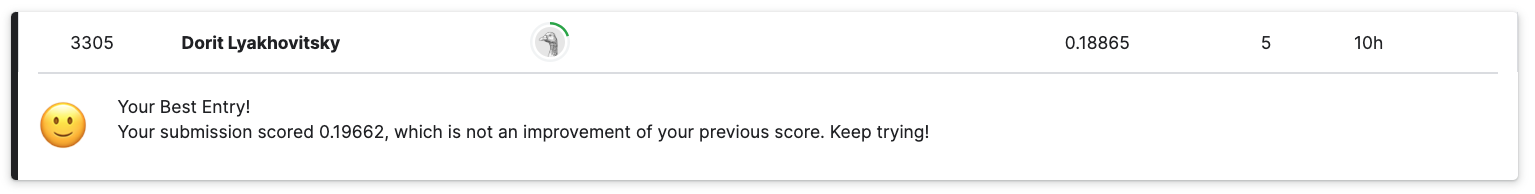

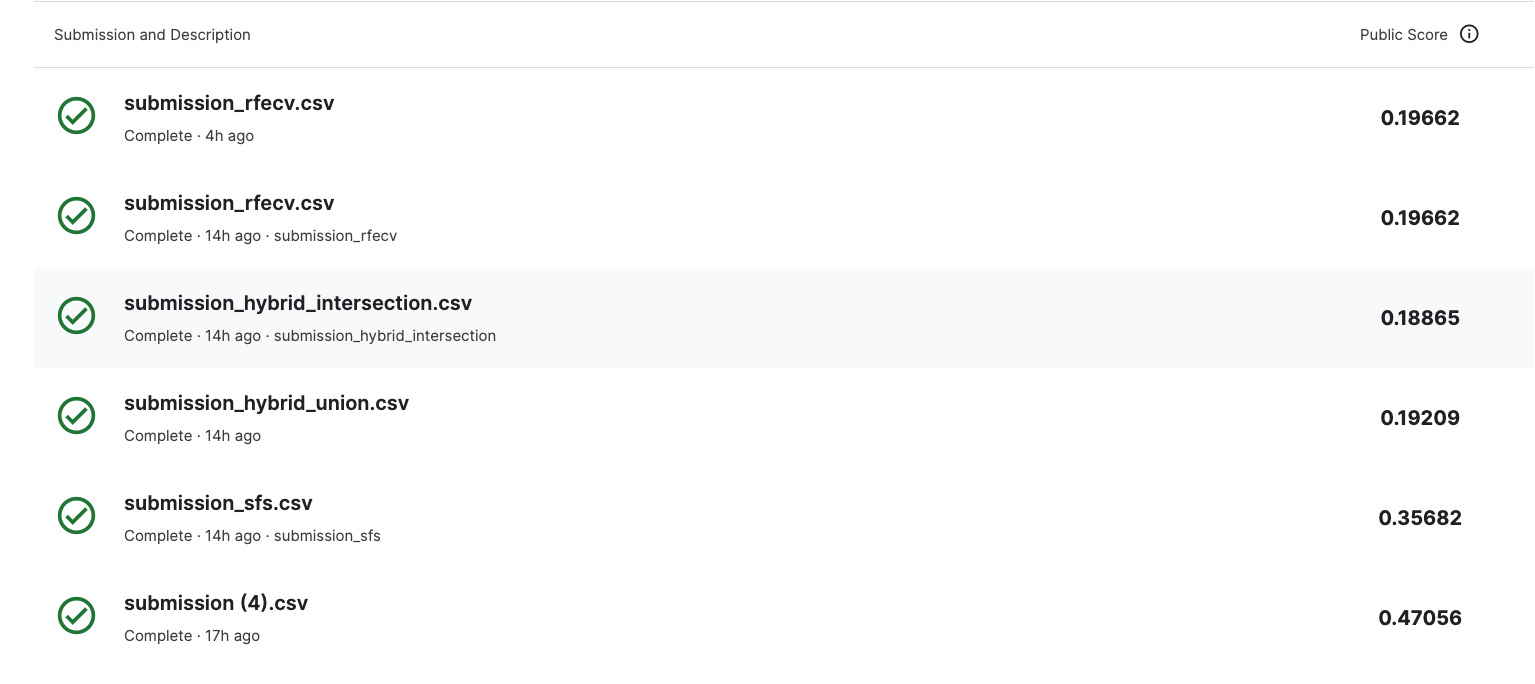

Best Submission - Hybrid intersection columns (RFECV & SFS) - 0.18865 by Kaggle Website

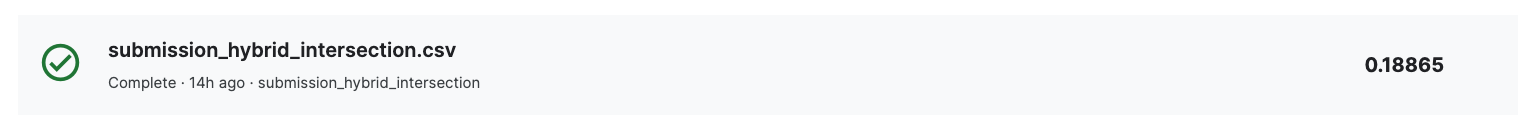

## Summary

What worked well:


*   Feature Selection using three approaches - Forward, Backward and Hybrid. The Hybrid intersection method actually gave us the best result.
*   Normalization - Even though we didn't see much of a difference between Lasso, Ridge and ElasticNet, it was nice to experiment with the different penalties.



## References

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder


*   Notebooks #6, #7

